In [ ]:
# load in all the modules we're going to need
import nltk
import collections

# function for making ngrams
from nltk.util import ngrams 

# for reading the dataset
import pandas as pd

In [2]:
# lets read the dataset
data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t')

# lets check the shape of the dataset
data.shape

(3150, 5)

In [3]:
# lets check the head of the dataset
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
# cleaning the texts
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Roshan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
## Cleaning the Data

corpus = []

for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])  ## Removing all Unecessary items
    review = review.lower()                                         ## Converting into Lower Case
    review = review.split()
    ps = PorterStemmer()                                            ## Stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]  ## Removing Stopwords
    review = ' '.join(review)
    corpus.append(review)

### Concept of N Grams

In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus.
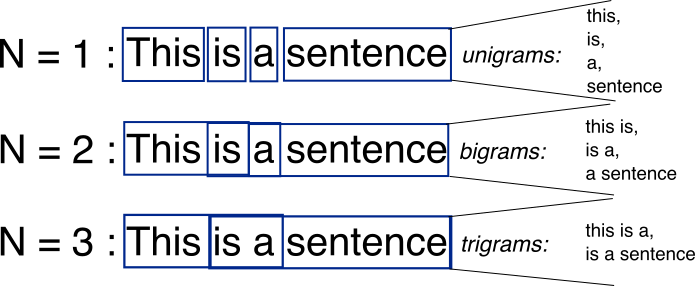

### Bag of Words with N Grams

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

In [11]:
# creating bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500, ngram_range=(2, 2)) # to use trigrams ngram_range=(3, 3))

x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


### TF-IDF

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents

In [12]:
# creating bag of words
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features = 2500, ngram_range=(2, 2)) #to use trigrams ngram_range = (3, 3)

x = tf.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)
